<a href="https://colab.research.google.com/github/DamodaraBarbosa/challenge_data_science_alura/blob/main/Challenge_Data_Science_Alura_Semana_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando dependências do Spark

In [417]:
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

Importando OS

In [418]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

Importando o Spark Session

In [419]:
import findspark
findspark.init()

In [420]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .getOrCreate()

In [421]:
spark

# Carregando dados no dataframe

In [422]:
data = spark.read.parquet('/content/drive/MyDrive/Alura/Challenge Data Science/part-00000-00341ba7-0a7c-4fef-a81e-1066725a64b1-c000.snappy.parquet')

In [423]:
data.show(10)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+----+-----+------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|              bairro|        zona|condominio|iptu| tipo| valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+----+-----+------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  null|       Usado| Apartamento|Residencial|   1|            Realengo|  Zona Oeste|       285|null|Venda| 22999|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|       Usado| Apartamento|Residencial|   0|               Irajá|  Zona Norte|       170|   0|Vend

# Seleção de features

In [424]:
# para selecionar as features utiliza-se o método distinct() a fim de obter os valores únicos para cada coluna do dataframe, num primeiro momento suspeita-se
# das colunas tipo_anuncio, tipo_uso e tipo.

### Coluna tipo_anuncio

In [425]:
data.select('tipo_anuncio').distinct().show()

+------------+
|tipo_anuncio|
+------------+
|       Usado|
+------------+



In [426]:
# todos os dados da coluna tipo_anuncio são iguais: "Usado"

### Coluna tipo_uso

In [427]:
data.select('tipo_uso').distinct().show()

+-----------+
|   tipo_uso|
+-----------+
|Residencial|
+-----------+



In [428]:
# todos os dados da coluna tipo_uso são iguais: "Residencial"

### Coluna tipo_unidade

In [429]:
data.select('tipo_unidade').distinct().show()

+------------+
|tipo_unidade|
+------------+
| Apartamento|
+------------+



In [430]:
# todos os dados da coluna tipo_unidade são iguais: "Apartamento"

### Coluna tipo

In [431]:
data.select('tipo').distinct().show()

+-----+
| tipo|
+-----+
|Venda|
+-----+



In [432]:
# todos os dados da coluna tipo são iguais: "Venda"

## Drop das colunas tipo_anuncio, tipo_uso, tipo_unidade e tipo


In [433]:
# como as colunas citadas acima possuem apenas uma única informação, podem ser eliminadas do dataframe a fim de deixar apenas dados mais significativos:

data = data.drop('tipo_anuncio')
data = data.drop('tipo_uso')
data = data.drop('tipo_unidade')
data = data.drop('tipo')
data.show(5)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+------------+------------+----------+----+------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|vaga|      bairro|        zona|condominio|iptu| valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+------------+------------+----------+----+------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  null|   1|    Realengo|  Zona Oeste|       285|null| 22999|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|   0|       Irajá|  Zona Norte|       170|   0|110000|
|1fa1c1e5-e98c-433...|    4|      null|       55|        1|                  []|      2|     0|   1|      Cosmos|  Zona Oeste|      null|null|115000|
|a6ab01ae-3d40-40e...|    2|      null|       55|        1|                  []|      2|     0|   0|

## Colunas area_total e area_util

In [434]:
# contando os valores da coluna area_total:

data.select('area_total').groupBy('area_total').count().show()

+----------+-----+
|area_total|count|
+----------+-----+
|       296|   31|
|       691|    1|
|       675|    1|
|       125|  253|
|       800|    5|
|   5698720|    1|
|        51|  206|
|       124|  159|
|         7|    2|
|       447|    1|
|       307|   25|
|     17583|    3|
|      1695|    1|
|      1500|    1|
|       205|   44|
|       169|   75|
|      7402|    4|
|       334|    6|
|       544|    1|
|       272|   11|
+----------+-----+
only showing top 20 rows



In [435]:
# contando os valores area_util:

data.select('area_util').groupBy('area_util').count().show()

+---------+-----+
|area_util|count|
+---------+-----+
|      296|   33|
|      675|    1|
|      125|  287|
|      800|    5|
|      944|    2|
|       51|  273|
|      124|  174|
|      447|    1|
|      307|   29|
|      205|   49|
|      169|   90|
|      334|    6|
|      544|    1|
|      740|    1|
|      272|   11|
|      470|   11|
|      462|    2|
|       54|  414|
|      232|   41|
|      234|   37|
+---------+-----+
only showing top 20 rows



In [436]:
# apesar de existirem vários valores que se repetem, visualizando-os de maneira mais ampla vemos que estes são abrangentes e não podem ser descartados.

In [437]:
# para contar os valores nulos nas colunas area_total e area_util temos que:

from pyspark.sql.functions import col, isnan, when, count, lit, explode, array_contains, size, isnull, array

In [438]:
null_area = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.select(['area_total', 'area_util']).columns])
null_area.show()

+----------+---------+
|area_total|area_util|
+----------+---------+
|      9194|        0|
+----------+---------+



In [439]:
# apenas a coluna area_total possui dados nulos.

# Convertendo os tipos das colunas

In [440]:
from pyspark.sql.types import IntegerType, DoubleType, StringType

In [441]:
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: long (nullable = true)
 |-- area_total: string (nullable = true)
 |-- area_util: string (nullable = true)
 |-- banheiros: long (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: long (nullable = true)
 |-- suites: long (nullable = true)
 |-- vaga: long (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: string (nullable = true)
 |-- iptu: string (nullable = true)
 |-- valor: string (nullable = true)



## Para o tipo Integer

Coluna andar

In [442]:
data = data.withColumn('andar', data['andar'].cast(IntegerType()))

Coluna banheiros

In [443]:
data = data.withColumn('banheiros', data['banheiros'].cast(IntegerType()))

Coluna suites

In [444]:
data = data.withColumn('suites', data['suites'].cast(IntegerType()))

Coluna quartos

In [445]:
data = data.withColumn('quartos', data['quartos'].cast(IntegerType()))

## Para o tipo Double

Coluna area_total

In [446]:
data = data.withColumn('area_total', data['area_total'].cast(DoubleType()))

Coluna area_util

In [447]:
data = data.withColumn('area_util', data['area_util'].cast(DoubleType()))

Coluna condominio

In [448]:
data = data.withColumn('condominio', data['condominio'].cast(DoubleType()))

Coluna iptu

In [449]:
data = data.withColumn('iptu', data['iptu'].cast(DoubleType()))

Coluna valor

In [450]:
data = data.withColumn('valor', data['valor'].cast(DoubleType()))

In [451]:
# por fim, mostra-se o Schema dos dados para verificar se houve a conversão dos tipos dos dados das colunas:

data.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: integer (nullable = true)
 |-- area_total: double (nullable = true)
 |-- area_util: double (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- vaga: long (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- valor: double (nullable = true)



# Tratamento da coluna características

In [452]:
# os dados em que a coluna caracteristicas apresentan arrays vazios:

data.filter(size('caracteristicas') == 0).show(5)

+--------------------+-----+----------+---------+---------+---------------+-------+------+----+------------+------------+----------+------+--------+
|                  id|andar|area_total|area_util|banheiros|caracteristicas|quartos|suites|vaga|      bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+----------+---------+---------+---------------+-------+------+----+------------+------------+----------+------+--------+
|1fe78d41-b8e0-4d2...|    0|      44.0|     44.0|        1|             []|      2|     0|   0|       Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|      null|     55.0|        1|             []|      2|     0|   1|      Cosmos|  Zona Oeste|      null|  null|115000.0|
|a6ab01ae-3d40-40e...|    2|      null|     55.0|        1|             []|      2|     0|   0|Tomás Coelho|  Zona Norte|      null|  null|115000.0|
|1d8ff7a2-16bd-4e3...|    0|      null|     50.0|        1|             []|      1|  null|   0|      Centr

In [453]:
# São ao todo:

f'{data.filter(size("caracteristicas") == 0).count()} linhas do dataframe com essa especificidade'

'12736 linhas do dataframe com essa especificidade'

In [454]:
# substitui-se os arrays vazios por valores nulos:

data = data.withColumn('caracteristicas', when((size(col('caracteristicas')) == 0), lit(None)).otherwise(col('caracteristicas')))

In [455]:
# e verifica-se que o número de linhas da coluna caracteristicas com valores nulos é igual ao número de linhas que tinham arrays vazios:

data.filter(data['caracteristicas'].isNull()).count()

12736

In [456]:
data.filter(data['caracteristicas'].isNull()).show(5)

+--------------------+-----+----------+---------+---------+---------------+-------+------+----+------------+------------+----------+------+--------+
|                  id|andar|area_total|area_util|banheiros|caracteristicas|quartos|suites|vaga|      bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+----------+---------+---------+---------------+-------+------+----+------------+------------+----------+------+--------+
|1fe78d41-b8e0-4d2...|    0|      44.0|     44.0|        1|           null|      2|     0|   0|       Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|      null|     55.0|        1|           null|      2|     0|   1|      Cosmos|  Zona Oeste|      null|  null|115000.0|
|a6ab01ae-3d40-40e...|    2|      null|     55.0|        1|           null|      2|     0|   0|Tomás Coelho|  Zona Norte|      null|  null|115000.0|
|1d8ff7a2-16bd-4e3...|    0|      null|     50.0|        1|           null|      1|  null|   0|      Centr

# Tratamento de dados nulos e NaN's

In [457]:
selected_data = data.select(
    'id', 'andar', 'area_total', 
    'area_util', 'banheiros', 'quartos', 
    'suites', 'vaga', 'bairro', 
    'zona', 'condominio', 'iptu', 'valor'
)

In [458]:
# a quantidade de valores nulos (None e NaN) para cada coluna:

data_count_null = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_data.columns])
data_count_null.show()

+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+
| id|andar|area_total|area_util|banheiros|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+
|  0|    0|      9194|        0|        0|      0|  5554|3017|     0|   0|      2371|7199|    0|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+



## Porcentagem dos valores nulos

In [459]:
# um possível tratamento para dados nulos é a eliminação desses dados do dataframe, porém isso só indicado quando os dados nulos não ultrapassam 10% dos dados:

total_data = data.count()
f'O dataframe possui {total_data} linhas com dados'

'O dataframe possui 66562 linhas com dados'

In [460]:
f'Os dados nulos da coluna area_total correspondem a {round(((9194 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna area_total correspondem a 13.81% dos dados'

In [461]:
f'Os dados nulos da coluna suites correspondem a {round(((5554 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna suites correspondem a 8.34% dos dados'

In [462]:
f'Os dados nulos da coluna vaga correspondem a {round(((3017 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna vaga correspondem a 4.53% dos dados'

In [463]:
f'Os dados nulos da coluna condominio correspondem a {round(((2371 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna condominio correspondem a 3.56% dos dados'

In [464]:
f'Os dados nulos da coluna iptu correspondem a {round(((7199 / total_data) * 100), 2)}% dos dados'

'Os dados nulos da coluna iptu correspondem a 10.82% dos dados'

## Estatísticas descritivas

In [465]:
# a tabela abaixo mostra algumas estatísticas descritivas dos dados do dataframe:

data_summary = data.summary()
data_summary.show()

+-------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+--------+------------------+------------------+------------------+
|summary|                  id|             andar|       area_total|         area_util|         banheiros|           quartos|            suites|              vaga|    bairro|    zona|        condominio|              iptu|             valor|
+-------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+--------+------------------+------------------+------------------+
|  count|               66562|             66562|            57368|             66562|             66562|             66562|             61008|             63545|     66562|   66562|             64191|             59363|             66562|
|   mean|                null|2.33745981

Mediana da coluna area_total

In [466]:
# ao usar o método collect() obtém-se um valor passando a linha em que este se encontra no dataframe, como anseia-se pela mediana:

area_total_median = data_summary.select('area_total').collect()[5][0]
area_total_median = float(area_total_median)
area_total_median

90.0

Mediana da coluna suites

In [467]:
suites_median = int(data_summary.select('suites').collect()[5][0])
suites_median

1

Mediana da coluna vaga

In [468]:
vaga_median = int(data_summary.select('vaga').collect()[5][0])
vaga_median

1

Mediana da coluna condominio

In [469]:
condominio_median = float(data_summary.select('condominio').collect()[5][0])
condominio_median

894.0

Mediana da coluna iptu

In [470]:
iptu_median = float(data_summary.select('iptu').collect()[5][0])
iptu_median

360.0

## Substituição dos valores nulos pelas medianas das respectivas colunas

In [471]:
columns_median = {
    'area_total': area_total_median,
    'suites': suites_median,
    'vaga': vaga_median,
    'condominio': condominio_median,
    'iptu': iptu_median
}                  

In [472]:
# para substituir os valores nulos para cada coluna:

for columns in columns_median.keys():
  data = data.na.fill(value= columns_median[columns], subset= [columns])

In [473]:
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in selected_data.columns]).show()

+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+
| id|andar|area_total|area_util|banheiros|quartos|suites|vaga|bairro|zona|condominio|iptu|valor|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+
|  0|    0|         0|        0|        0|      0|     0|   0|     0|   0|         0|   0|    0|
+---+-----+----------+---------+---------+-------+------+----+------+----+----------+----+-----+



In [474]:
# todos os valores nulos foram substituídos pela mediana das respectivas colunas

In [475]:
data.show(10)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------------------+------------+----------+------+--------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|vaga|              bairro|        zona|condominio|  iptu|   valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+----+--------------------+------------+----------+------+--------+
|03a386b6-7ab8-4ef...|    0|      43.0|     43.0|        1|[Churrasqueira, A...|      2|     1|   1|            Realengo|  Zona Oeste|     285.0| 360.0| 22999.0|
|1fe78d41-b8e0-4d2...|    0|      44.0|     44.0|        1|                null|      2|     0|   0|               Irajá|  Zona Norte|     170.0|   0.0|110000.0|
|1fa1c1e5-e98c-433...|    4|      90.0|     55.0|        1|                null|      2|     0|   1|              Cosmos|  Zona Oeste|     894.0| 360.0|115000.0|
|a6ab01ae-3d40-40e...|    2|

# Preparação dos dados para machine learning

## Coluna dummies

In [476]:
# os dados presentes nos arrays da coluna são:

caracteristicas = data.select(explode('caracteristicas').alias('caracteristicas')).distinct()
caracteristicas.show()

+------------------+
|   caracteristicas|
+------------------+
|Condomínio fechado|
|        Playground|
| Portão eletrônico|
|           Piscina|
|Animais permitidos|
|      Portaria 24h|
|          Elevador|
|          Academia|
|   Salão de festas|
|     Churrasqueira|
+------------------+



In [477]:
list_caracteristicas = [
    'Condomínio fechado', 'Playground', 'Portão eletrônico',
    'Piscina', 'Animais permitidos', 'Portaria 24h', 'Elevador',
    'Academia', 'Salão de festas', 'Churrasqueira'
]

In [478]:
# dummies para as características do imóvel:

for caracteristica in list_caracteristicas:
  data = data.withColumn(caracteristica, when(array_contains(col("caracteristicas"), caracteristica) == True, lit(1)).otherwise(0))

In [479]:
# elimina-se a coluna caracteristicas do dataframe:

data = data.drop('caracteristicas')

In [480]:
data.columns

['id',
 'andar',
 'area_total',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'bairro',
 'zona',
 'condominio',
 'iptu',
 'valor',
 'Condomínio fechado',
 'Playground',
 'Portão eletrônico',
 'Piscina',
 'Animais permitidos',
 'Portaria 24h',
 'Elevador',
 'Academia',
 'Salão de festas',
 'Churrasqueira']

# Zona dummies

In [481]:
# as zonas presentes no dataframe:

data.select('zona').distinct().show()

+------------+
|        zona|
+------------+
|  Zona Norte|
|  Zona Oeste|
|Zona Central|
|    Zona Sul|
|            |
+------------+



In [482]:
# para gerar os dummies para a variável zona:

zonas = data.groupBy('id').pivot('zona').agg(lit(1)).fillna(0)

In [483]:
zonas = zonas.drop('')

In [484]:
zonas.show(5)

+--------------------+------------+----------+----------+--------+
|                  id|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+------------+----------+----------+--------+
|4e47e4d4-3326-4eb...|           0|         0|         0|       1|
|02fba6ef-a691-442...|           0|         0|         1|       0|
|fc03c1a9-8bbb-41a...|           0|         1|         0|       0|
|3dd5d200-0a7f-43d...|           0|         0|         0|       1|
|82707939-71bd-40c...|           0|         0|         0|       1|
+--------------------+------------+----------+----------+--------+
only showing top 5 rows



In [485]:
# juntado esses dados ao dataframe:

data = data.join(zonas, 'id', how= 'inner')

In [486]:
# elimina-se a coluna zona:

data = data.drop('zona')

In [487]:
data.show(5)

+--------------------+-----+----------+---------+---------+-------+------+----+------------+----------+------+--------+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+------------+----------+----------+--------+
|                  id|andar|area_total|area_util|banheiros|quartos|suites|vaga|      bairro|condominio|  iptu|   valor|Condomínio fechado|Playground|Portão eletrônico|Piscina|Animais permitidos|Portaria 24h|Elevador|Academia|Salão de festas|Churrasqueira|Zona Central|Zona Norte|Zona Oeste|Zona Sul|
+--------------------+-----+----------+---------+---------+-------+------+----+------------+----------+------+--------+------------------+----------+-----------------+-------+------------------+------------+--------+--------+---------------+-------------+------------+----------+----------+--------+
|03a386b6-7ab8-4ef...|    0|      43.0|     43.0|        1|      2|     1|   1|    Realengo|     285

In [488]:
# remove-se a coluna bairro:

data = data.drop('bairro')

# Salvando a base de dados em formato parquet

In [489]:
data.columns

['id',
 'andar',
 'area_total',
 'area_util',
 'banheiros',
 'quartos',
 'suites',
 'vaga',
 'condominio',
 'iptu',
 'valor',
 'Condomínio fechado',
 'Playground',
 'Portão eletrônico',
 'Piscina',
 'Animais permitidos',
 'Portaria 24h',
 'Elevador',
 'Academia',
 'Salão de festas',
 'Churrasqueira',
 'Zona Central',
 'Zona Norte',
 'Zona Oeste',
 'Zona Sul']

In [490]:
# renomeando as novas colunas para que estejam adequadas ao formato parquet:

data = data.withColumnRenamed('Condomínio fechado', 'condominio_fechado')\
        .withColumnRenamed('Playground', 'playground')\
        .withColumnRenamed('Portão eletrônico', 'portao_eletronico')\
        .withColumnRenamed('Piscina', 'piscina')\
        .withColumnRenamed('Animais permitidos', 'animais_permitidos')\
        .withColumnRenamed('Portaria 24h', 'portaria_24h')\
        .withColumnRenamed('Elevador', 'elevador')\
        .withColumnRenamed('Academia', 'academia')\
        .withColumnRenamed('Salão de festas', 'salao_de_festas')\
        .withColumnRenamed('Churrasqueira', 'churrasqueira')\
        .withColumnRenamed('Zona Central', 'zona_central')\
        .withColumnRenamed('Zona Norte', 'zona_norte')\
        .withColumnRenamed('Zona Oeste', 'zona_oeste')\
        .withColumnRenamed('Zona Sul', 'zona_sul')

In [491]:
data.write.parquet('dataset_imoveis_RJ')

AnalysisException: ignored

# Vetorização dos dados

In [492]:
from pyspark.ml.feature import VectorAssembler

In [493]:
features = ['andar', 'area_total', 'area_util', 'banheiros', 'quartos', 'suites', 'vaga',
            'condominio', 'iptu', 'valor', 'condominio_fechado', 'playground', 'portao_eletronico',
            'piscina', 'animais_permitidos', 'portaria_24h', 'elevador', 'academia', 'salao_de_festas',
            'churrasqueira', 'zona_central', 'zona_norte', 'zona_oeste', 'zona_sul']

In [494]:
assembler = VectorAssembler(inputCols= features, outputCol= 'features')

In [495]:
output = assembler.transform(data)

In [496]:
output = output.select('features', 'valor').withColumnRenamed('valor', 'values')


In [497]:
output.show(5, truncate= False)

+-----------------------------------------------------------------------------------------------------------+--------+
|features                                                                                                   |values  |
+-----------------------------------------------------------------------------------------------------------+--------+
|[0.0,43.0,43.0,1.0,2.0,1.0,1.0,285.0,360.0,22999.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0]|22999.0 |
|(24,[1,2,3,4,7,9,21],[44.0,44.0,1.0,2.0,170.0,110000.0,1.0])                                               |110000.0|
|(24,[0,1,2,3,4,6,7,8,9,22],[4.0,90.0,55.0,1.0,2.0,1.0,894.0,360.0,115000.0,1.0])                           |115000.0|
|(24,[0,1,2,3,4,7,8,9,21],[2.0,90.0,55.0,1.0,2.0,894.0,360.0,115000.0,1.0])                                 |115000.0|
|(24,[1,2,3,4,5,7,8,9,20],[90.0,50.0,1.0,1.0,1.0,1300.0,2679.0,125000.0,1.0])                               |125000.0|
+-----------------------------------------------

# Modelo de regressão linear

In [498]:
from pyspark.ml.regression import LinearRegression

In [525]:
# definindo os dados de treinamento e teste:

train_data, test_data = output.randomSplit([0.7, 0.3], seed= 101)

In [526]:
# modelo:

regressor = LinearRegression(featuresCol= 'features', labelCol= 'values')
regressor = regressor.fit(train_data)

In [527]:
# predições treino:

pred_train_data = regressor.evaluate(train_data)
pred_train_data.predictions.show(5)

+--------------------+---------+------------------+
|            features|   values|        prediction|
+--------------------+---------+------------------+
|(24,[0,1,2,3,4,5,...| 165000.0|165000.00000000015|
|(24,[0,1,2,3,4,5,...| 690000.0| 690000.0000000002|
|(24,[0,1,2,3,4,5,...|2850000.0|         2850000.0|
|(24,[0,1,2,3,4,5,...|3250000.0|3249999.9999999995|
|(24,[0,1,2,3,4,5,...|6900000.0| 6899999.999999999|
+--------------------+---------+------------------+
only showing top 5 rows



In [528]:
# predições teste:

pred_test_data = regressor.evaluate(test_data)
pred_test_data.predictions.show(5)

+--------------------+---------+------------------+
|            features|   values|        prediction|
+--------------------+---------+------------------+
|(24,[0,1,2,3,4,5,...|4140000.0|         4140000.0|
|(24,[0,1,2,3,4,5,...|4090000.0|         4090000.0|
|(24,[0,1,2,3,4,5,...| 250000.0| 250000.0000000001|
|(24,[0,1,2,3,4,5,...| 112000.0|112000.00000000019|
|(24,[0,1,2,3,4,5,...| 145000.0| 145000.0000000001|
+--------------------+---------+------------------+
only showing top 5 rows



# Avaliação do modelo de regressão linear

## Treino

### RMSE

In [529]:
f'RMSE para os dados de treino: {pred_train_data.rootMeanSquaredError}'

'RMSE para os dados de treino: 1.1797639640974213e-09'

### R²

In [530]:
f'R² para os dados de treino: {pred_train_data.r2}'

'R² para os dados de treino: 1.0'

## Teste

In [531]:
f'RMSE para os dados de teste: {pred_test_data.rootMeanSquaredError}'

'RMSE para os dados de teste: 1.3460665178383408e-09'

In [532]:
f'R² para os dados de teste: {pred_test_data.r2}'

'R² para os dados de teste: 1.0'

# Análise de correlação

In [534]:
from pyspark.ml.stat import Correlation
import pandas as pd

In [539]:
correlation = Correlation.corr(output, 'features').collect()[0][0]

In [542]:
df_correlation = pd.DataFrame(correlation.toArray(), columns= features, index= features)

In [546]:
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
colors = sns.color_palette("light:orange", as_cmap=True)

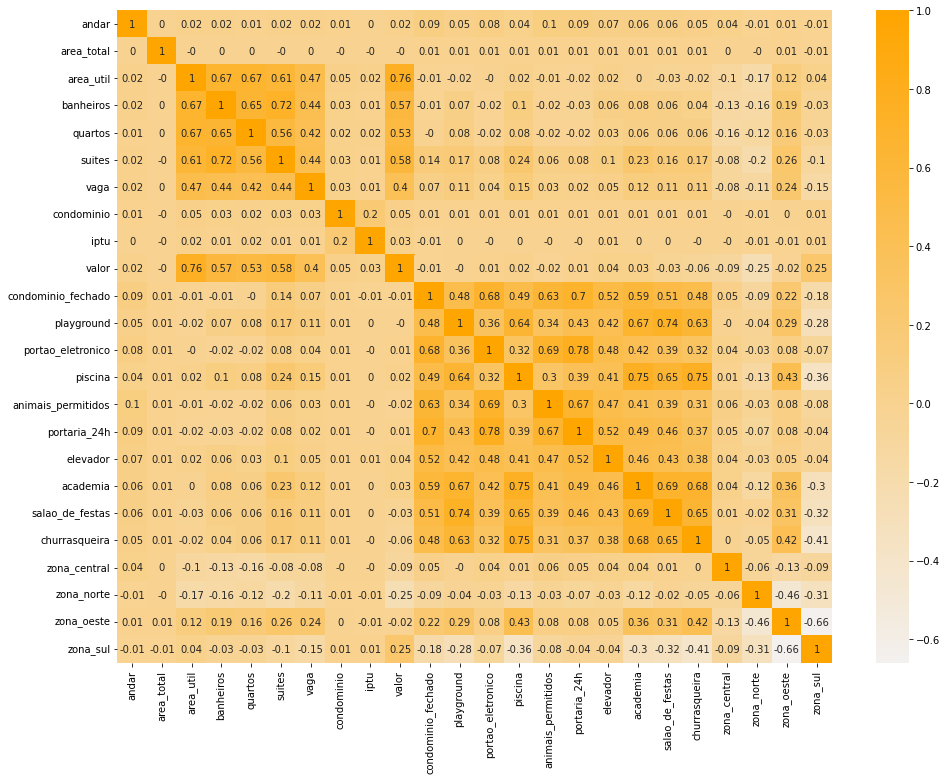

In [552]:
plt.figure(figsize= (16, 12))
sns.heatmap(df_correlation.round(2), annot= True, cmap= colors)
plt.show()